In [1]:
import os
import json
import datetime
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import cv2

# See how to make a simple dummy data sample

In [ ]:
# def generate_square_image(size, square_size, noise_level=0.0):
#     """
#     Generates an image with a white square in the center.

#     Args:
#         size (int): The size of the image (size x size).
#         square_size (int): The size of the square.
#         noise_level (float): Standard deviation of Gaussian noise.

#     Returns:
#         numpy.ndarray: The image as a numpy array.
#         tuple: Bounding box (x_min, y_min, width, height).
#         list: Segmentation polygon points.
#     """
#     # Create a blank image
#     img = np.zeros((size, size))
    
#     # Calculate square position
#     start = (size - square_size) // 2
#     end = start + square_size
    
#     # Add square to the image
#     img[start:end, start:end] = 1
    
#     # Create bounding box
#     bbox = (start, start, square_size, square_size)
    
#     # Create segmentation polygon (clockwise order of points)
#     segmentation = [
#         start, start,                    # top-left
#         start, start + square_size,      # bottom-left
#         start + square_size, start + square_size,  # bottom-right
#         start + square_size, start       # top-right
#     ]

#     # Add noise if needed
#     if noise_level > 0:
#         noise = np.random.normal(0, noise_level, img.shape)
#         img = np.clip(img + noise, 0, 1)

#     return img, bbox, segmentation

def create_mask_from_segmentation(segmentation, img_shape):
    """
    Create a mask from segmentation points.

    Args:
        segmentation (list): List of segmentation points.
        img_shape (tuple): Shape of the image.

    Returns:
        numpy.ndarray: Mask as a numpy array.
    """
    mask = np.zeros(img_shape, dtype=np.uint8)
    segmentation_array = np.array(segmentation).reshape(-1, 2)
    vertices = segmentation_array.astype(np.int32).reshape((-1, 1, 2)) # Convert segmentation points to integer vertices for cv2.fillPoly
    cv2.fillPoly(mask, [vertices], 1) # Use cv2.fillPoly to create the mask
    return mask

def plot_image_with_bbox_and_mask(img, bbox, mask):
    """
    Plot the image with bounding box and mask overlay.

    Args:
        img (numpy.ndarray): The image.
        bbox (tuple): Bounding box (x_min, y_min, width, height).
        mask (numpy.ndarray): Mask to overlay.
    """

    # Plot the image with 5 subplots
    fig, ax = plt.subplots(1, 5, figsize=(25, 5))

    # First subplot - Raw Image
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title('Raw Image')

    # Second subplot - Mask (for visualization)
    ax[1].imshow(mask, cmap='gray')
    ax[1].set_title('Segmentation Mask')

    # Third subplot - Bounding Box & Segmentation (on black background)
    x, y, width, height = bbox
    rect = Rectangle((x-0.5, y-0.5), width, height, linewidth=2, edgecolor='r', facecolor='none')
    ax[2].imshow(np.zeros_like(img), cmap='gray')
    ax[2].add_patch(rect)
    ax[2].set_title('Bounding Box')

    # Fourth subplot - Raw Image with Bounding Box
    rect = Rectangle((x-0.5, y-0.5), width, height, linewidth=2, edgecolor='r', facecolor='none')
    ax[3].imshow(img, cmap='gray')
    ax[3].add_patch(rect)
    ax[3].set_title('Raw Image with Bounding Box')

    # Fifth subplot - Image with mask overlay
    rect = Rectangle((x-0.5, y-0.5), width, height, linewidth=2, edgecolor='r', facecolor='none')
    mask_overlay = np.zeros_like(img, dtype=np.float32)
    mask_overlay[mask == 1] = 0.3  # Semi-transparent overlay where mask is 1
    ax[4].imshow(img, cmap='gray')  # Base image in grayscale
    ax[4].imshow(np.stack([mask_overlay, mask_overlay*0, mask_overlay*0], axis=2), alpha=0.5)  # Red overlay
    ax[4].add_patch(rect)  # Add bounding box
    ax[4].set_title('Image with Mask Overlay')

    plt.tight_layout()
    plt.show()

In [3]:
# # Example usage:
# size = 100
# square_size = 40
# img, bbox, segmentation = generate_square_image(size, square_size, noise_level=0.1)

# # Create mask from segmentation
# mask = create_mask_from_segmentation(segmentation, img.shape)
# plot_image_with_bbox_and_mask(img, bbox, mask)

# Create Dummy coco dataset

In [ ]:
# def create_coco_json(num_images=2, image_size=32, square_sizes=[10, 12], split="train"):
#     """
#     Creates a COCO-format JSON using our square image generator
#     """
#     # Initialize the COCO JSON structure
#     coco_data = {
#         "info": {
#             "description": "Dummy Dataset with Squares",
#             "url": None,
#             "version": "1.0",
#             "year": datetime.datetime.now().year,
#             "contributor": None,
#             "date_created": datetime.datetime.now().strftime("%Y-%m-%d")
#         },
#         "licenses": [],
#         "images": [],
#         "annotations": [],
#         "categories": [
#             {"id": 1, "name": "square", "supercategory": "object"}
#         ]
#     }
    
#     annotation_id = 1
    
#     # Generate data for each image
#     for img_id in range(num_images):
#         # Add image information
#         image_info = {
#             "id": img_id,
#             "width": image_size,
#             "height": image_size,
#             "file_name": f"image_{img_id:04d}.jpg"
#         }
#         coco_data["images"].append(image_info)
        
#         # Generate square for this image
#         square_size = random.choice(square_sizes)
#         img, bbox, segmentation = generate_square_image(image_size, square_size, noise_level=0.1)
        
#         # Extract bounding box values
#         x_min, y_min, width, height = bbox
        
#         # Calculate area
#         area = float(width * height)
        
#         # Add annotation
#         annotation = {
#             "id": annotation_id,
#             "image_id": img_id,
#             "category_id": 1,  # Square
#             "segmentation": [segmentation],
#             "area": area,
#             "bbox": [float(x_min), float(y_min), float(width), float(height)], #! use -0.5 to 0.5 for bbox
#             "iscrowd": 0
#         }
#         coco_data["annotations"].append(annotation)
#         annotation_id += 1

#         # Save the image
#         if split == "train":
#             plt.imsave(f"imgs/image_{img_id:04d}.jpg", img, cmap='gray')
#         else:
#             plt.imsave(f"test_imgs/image_{img_id:04d}.jpg", img, cmap='gray')
    
#     # Save the COCO JSON
#     if split == "train":
#         with open("imgs/annotations.json", 'w') as f:
#             json.dump(coco_data, f)
    
#     return coco_data

# # Generate the dataset
# if __name__ == "__main__":
#     create_coco_json(num_images=400, image_size=32, square_sizes=[6, 8, 10, 12])
#     create_coco_json(num_images=20, image_size=32, square_sizes=[6, 8, 10, 12], split="test")

# Re-visualise from coco dataset

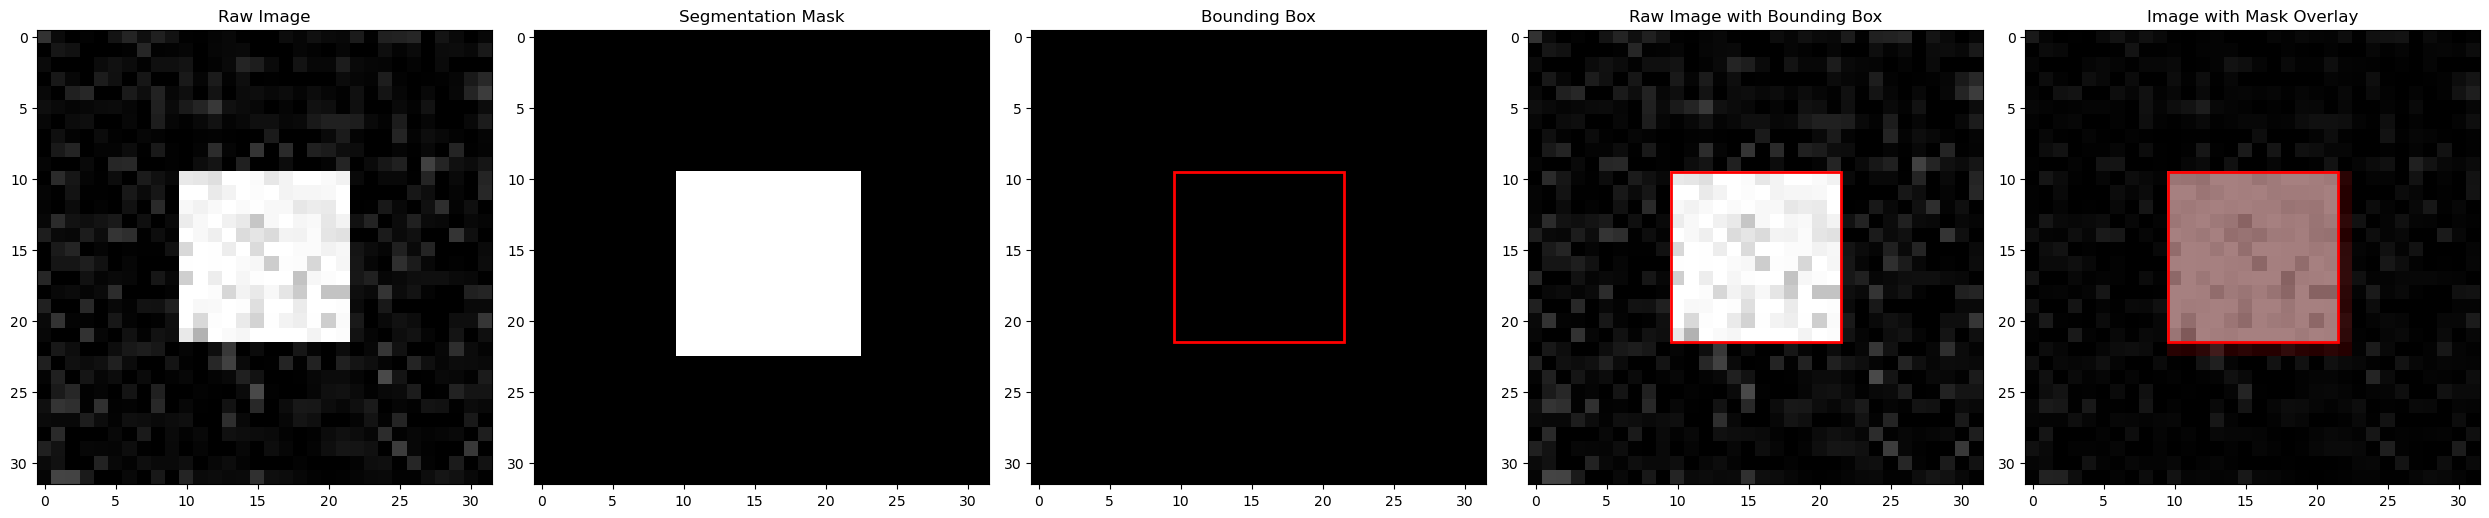

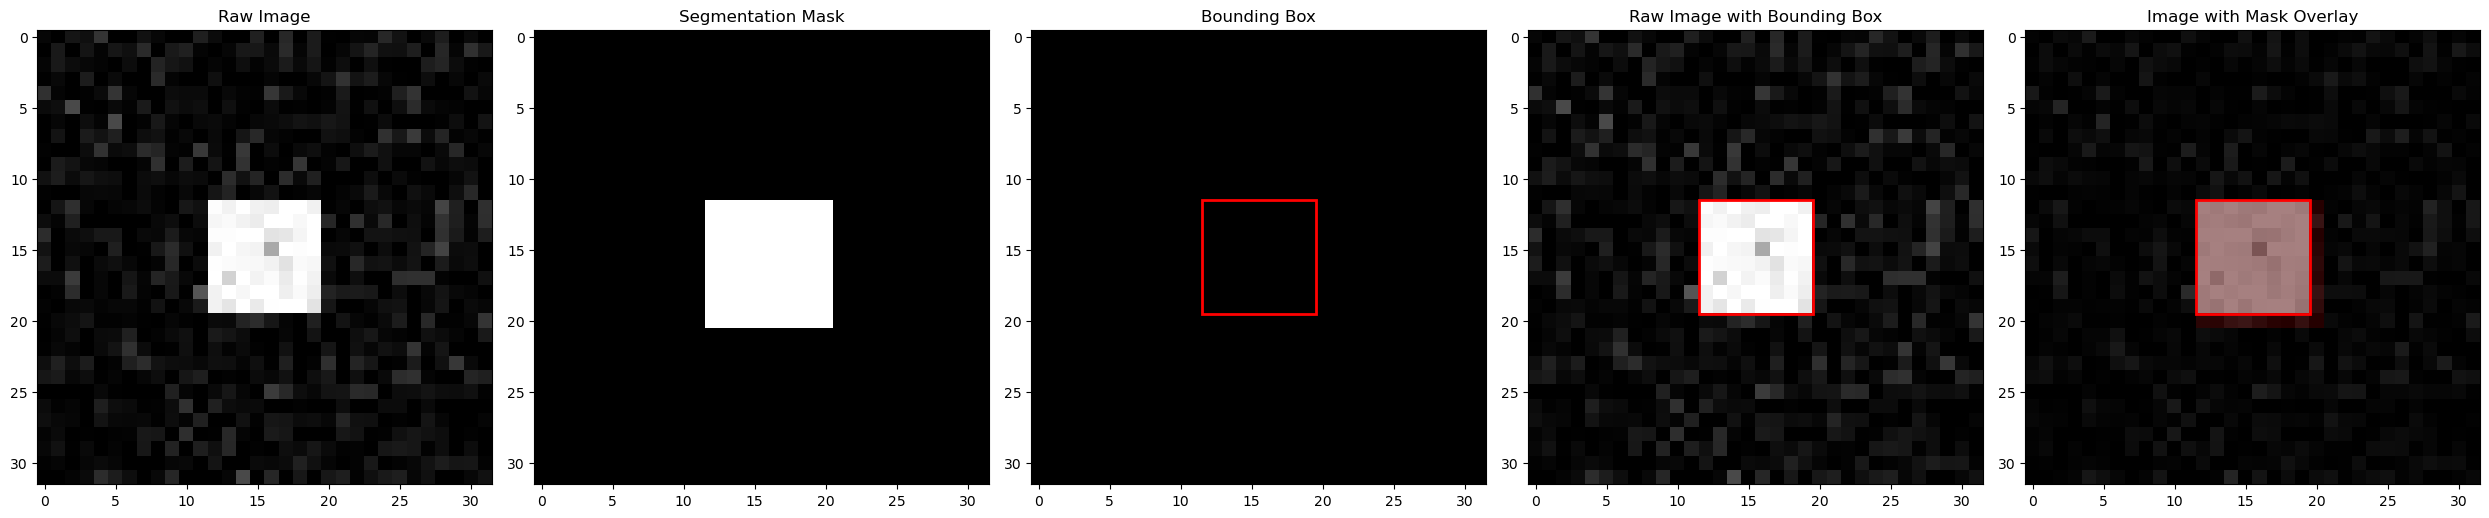

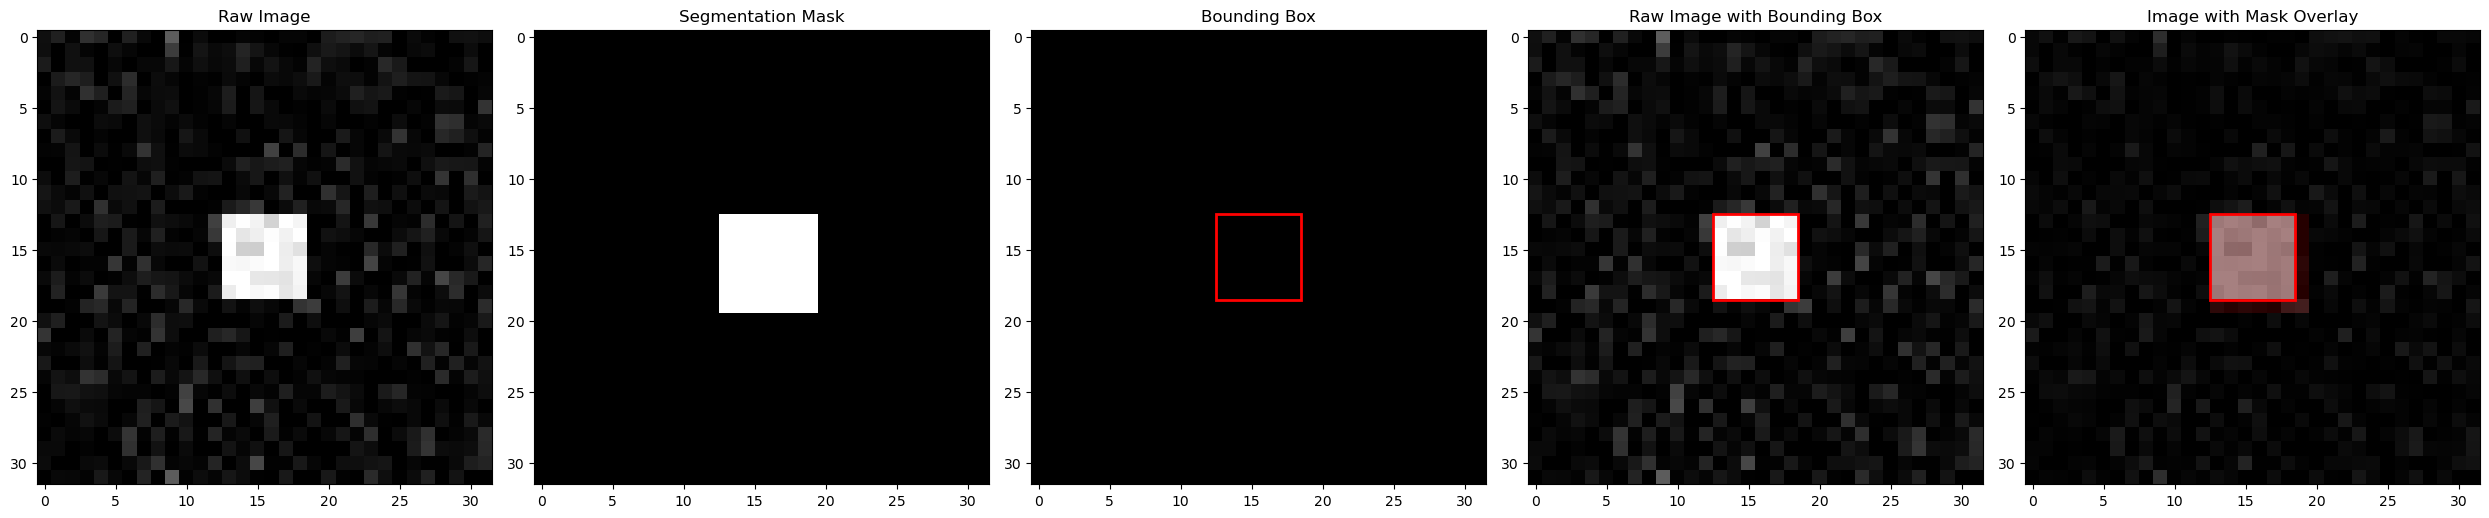

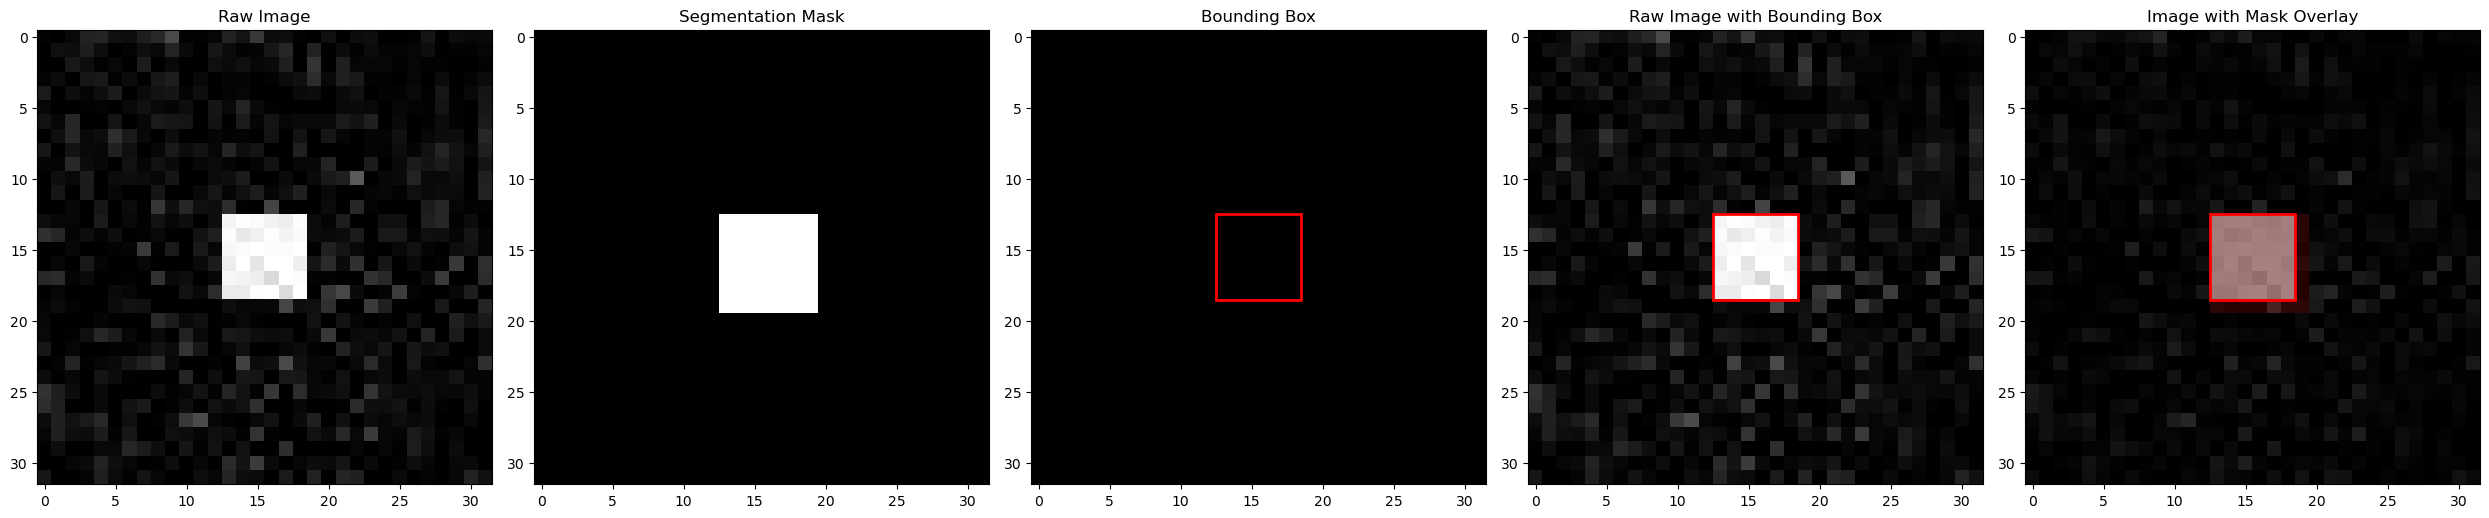

In [5]:
def visualize_coco_data(json_path, img_dir, num_images=5):
    """
    Visualizes COCO data by plotting images with bounding boxes and masks.

    Args:
        json_path (str): Path to the COCO JSON file.
        img_dir (str): Directory containing the images.
        num_images (int): Number of images to visualize.
    """
    # Load the COCO JSON file
    with open(json_path, 'r') as f:
        coco_data = json.load(f)
    
    # Create a dictionary mapping image_id to annotations
    image_to_annotations = {}
    for annotation in coco_data["annotations"]:
        image_id = annotation["image_id"]
        if image_id not in image_to_annotations:
            image_to_annotations[image_id] = []
        image_to_annotations[image_id].append(annotation)
    
    # Process each image
    num_visualized = 0
    for image_info in coco_data["images"]:
        image_id = image_info["id"]
        file_name = image_info["file_name"]
        
        # Skip if no annotations for this image
        if image_id not in image_to_annotations:
            print(f"No annotations found for image {file_name}")
            continue
        
        # Load the image
        img_path = os.path.join(img_dir, file_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) / 255.0  # Read image in grayscale and normalize
        
        # Get all annotations for this image
        annotations = image_to_annotations[image_id]
        
        # Plot the image with bounding boxes and masks
        for annotation in annotations:
            bbox = annotation["bbox"]
            segmentation = annotation["segmentation"][0]
            mask = create_mask_from_segmentation(segmentation, img.shape)
            plot_image_with_bbox_and_mask(img, bbox, mask)
        
        num_visualized += 1
        if num_visualized >= num_images:
            break

# Example usage
json_path = "imgs/annotations.json"
img_dir = "imgs"
visualize_coco_data(json_path, img_dir, num_images=4)
